# COVID-19 Analysis & Visualizations

### Import necessary tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import warnings

warnings.filterwarnings("ignore")

### Load dataset

In [2]:
path_to_dataset = 'novel-corona-virus-2019-dataset'

In [3]:
data = pd.read_csv(f'{path_to_dataset}/covid_19_data.csv')

### Dataset info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7617 entries, 0 to 7616
Data columns (total 8 columns):
SNo                7617 non-null int64
ObservationDate    7617 non-null object
Province/State     4358 non-null object
Country/Region     7617 non-null object
Last Update        7617 non-null object
Confirmed          7617 non-null float64
Deaths             7617 non-null float64
Recovered          7617 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 476.1+ KB


In [5]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,7617.000000,7617.000000,7617.000000,7617.000000
mean,3809.000000,638.131417,22.004726,234.410792
std,2198.982833,4940.796105,220.773353,2670.301719
min,1.000000,0.000000,0.000000,0.000000
25%,1905.000000,2.000000,0.000000,0.000000
50%,3809.000000,16.000000,0.000000,0.000000
75%,5713.000000,125.000000,1.000000,10.000000
max,7617.000000,67800.000000,4825.000000,58946.000000


In [6]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Preprocessing

### Missing values

In [7]:
data.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     3259
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [8]:
# Filling null values with `Unknown`
data.fillna('Unknown', inplace=True)

In [9]:
data.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

### Renaming columns

In [10]:
data.rename(columns={'ObservationDate': 'Observed', 'Last Update': 'Updated'}, inplace=True)

In [11]:
data.tail()

,SNo,Observed,Province/State,Country/Region,Updated,Confirmed,Deaths,Recovered
7612,7613,03/21/2020,Unknown,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7613,7614,03/21/2020,Unknown,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7614,7615,03/21/2020,Unknown,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7615,7616,03/21/2020,Unknown,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7616,7617,03/21/2020,Unknown,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


### Normalizing dates

In [12]:
data['Observed'] = data['Observed'].apply(pd.to_datetime)
data['Updated'] = data['Updated'].apply(pd.to_datetime)

In [13]:
data.head()

,SNo,Observed,Province/State,Country/Region,Updated,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


### Processing columns

In [14]:
data.drop(['SNo'], axis=1, inplace=True) # We don't need this column
data['Active'] = data['Confirmed'] - data['Recovered'] - data['Deaths'] # Non recovered or active cases

## Analysis & Visualizations

In [15]:
total_cases = data.groupby(['Observed']).sum().reset_index()
total_cases.style.background_gradient(cmap='Reds')

,Observed,Confirmed,Deaths,Recovered,Active
0,2020-01-22 00:00:00,555,17,28,510
1,2020-01-23 00:00:00,653,18,30,605
2,2020-01-24 00:00:00,941,26,36,879
3,2020-01-25 00:00:00,1438,42,39,1357
4,2020-01-26 00:00:00,2118,56,52,2010
5,2020-01-27 00:00:00,2927,82,61,2784
6,2020-01-28 00:00:00,5578,131,107,5340
7,2020-01-29 00:00:00,6165,133,126,5906
8,2020-01-30 00:00:00,8235,171,143,7921
9,2020-01-31 00:00:00,9925,213,222,9490


In [16]:
observed_list = total_cases['Observed'].tolist()
print('First Observabled Date:', observed_list[0].strftime('%b %d, %Y'))
print('Last Observabled Date:', observed_list[-1].strftime('%b %d, %Y'))
print('Total days observed:', len(observed_list))

First Observabled Date: Jan 22, 2020
Last Observabled Date: Mar 21, 2020
Total days observed: 60


Text(0.5, 1.0, 'Total Cases in the World')

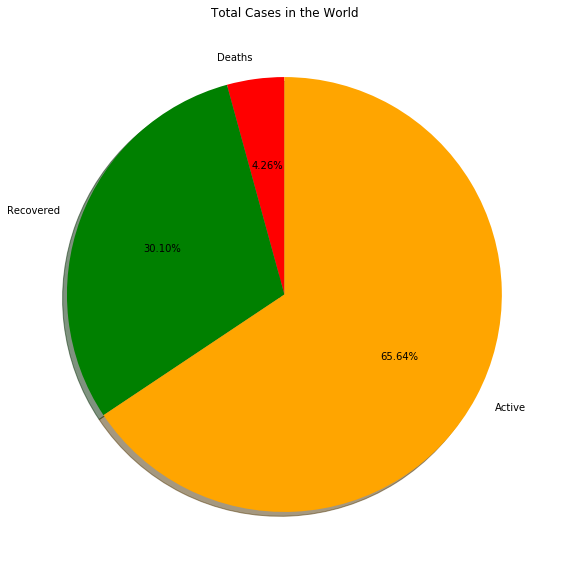

In [17]:
values = total_cases.drop(['Observed', 'Confirmed'], axis=1)[-1:].values.transpose()
plt.figure(figsize=(10,10))
plt.pie(values, 
        labels=['Deaths', 'Recovered', 'Active'], 
        colors=['red', 'green', 'orange'],
        autopct='%.2f%%', 
        startangle=90, 
        shadow=True)
plt.title('Total Cases in the World')

Text(0, 0.5, 'Cases')

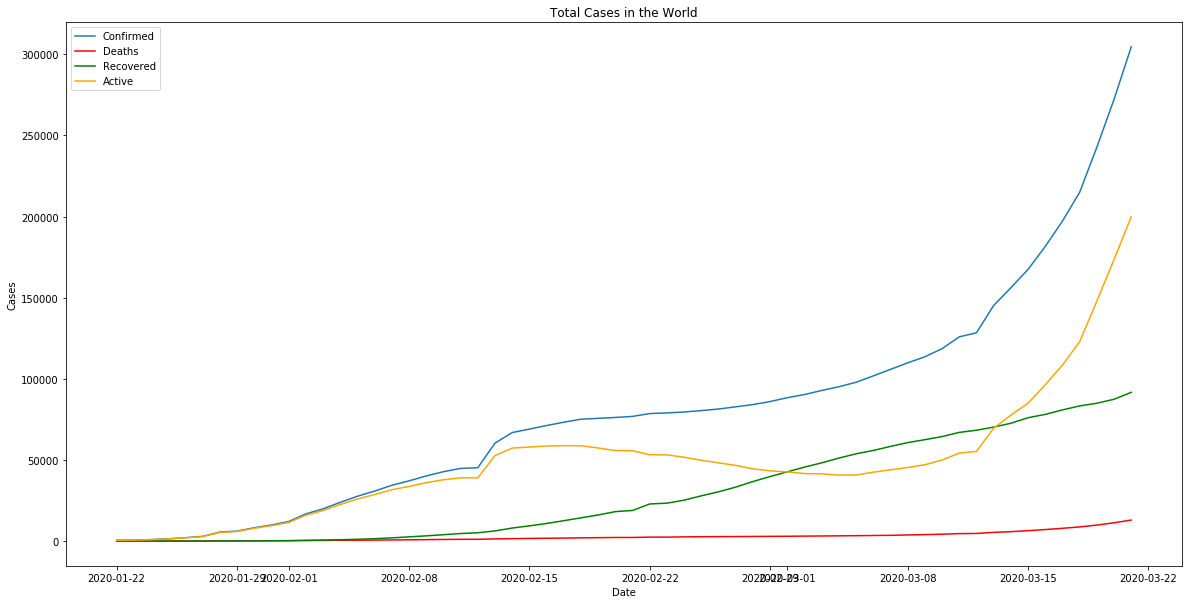

In [19]:
plt.figure(figsize=(20,10))
sns.lineplot(total_cases['Observed'], total_cases['Confirmed'])
sns.lineplot(total_cases['Observed'], total_cases['Deaths'], color='red')
sns.lineplot(total_cases['Observed'], total_cases['Recovered'], color='green')
sns.lineplot(total_cases['Observed'], total_cases['Active'], color='orange')
plt.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])
plt.title('Total Cases in the World')
plt.xlabel('Date')
plt.ylabel('Cases')

Text(0, 0.5, 'Rate')

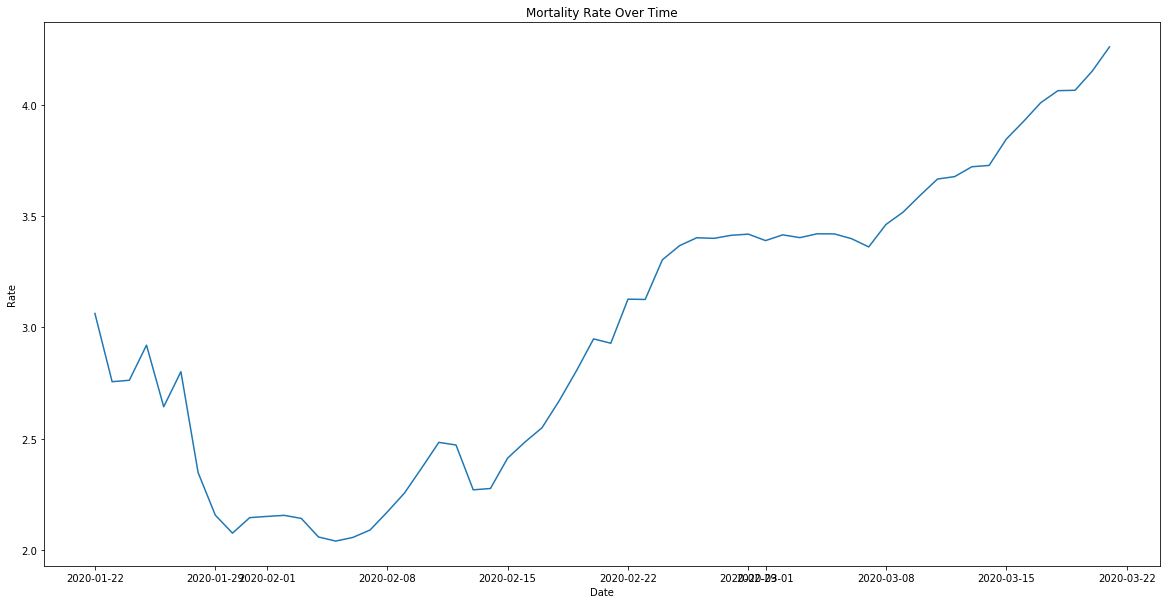

In [20]:
plt.figure(figsize=(20,10))
sns.lineplot(total_cases['Observed'], total_cases['Deaths']*100/total_cases['Confirmed'])
plt.title('Mortality Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')

Text(0, 0.5, 'Rate')

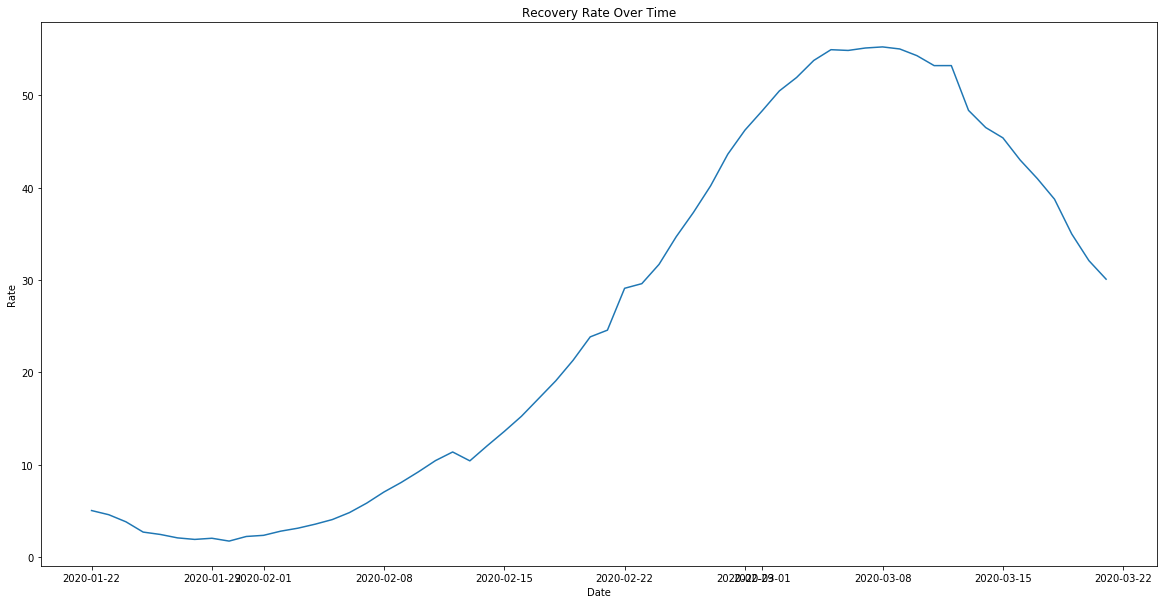

In [21]:
plt.figure(figsize=(20,10))
sns.lineplot(total_cases['Observed'], total_cases['Recovered']*100/total_cases['Confirmed'])
plt.title('Recovery Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')

In [22]:
dictByLastDate = {'Confirmed': total_cases['Confirmed'].tolist()[-1], 
                  'Deaths': total_cases['Deaths'].tolist()[-1], 
                  'Recovered': total_cases['Recovered'].tolist()[-1], 
                  'Active': total_cases['Active'].tolist()[-1]}

total_column = 'Total cases by ' + observed_list[-1].strftime('%b %d, %Y')
total_data = pd.DataFrame.from_dict(dictByLastDate, 
                                    orient='index', 
                                    columns=[total_column])

total_data.style.background_gradient(cmap='Reds')

,"Total cases by Mar 21, 2020"
Confirmed,304528
Deaths,12973
Recovered,91676
Active,199879


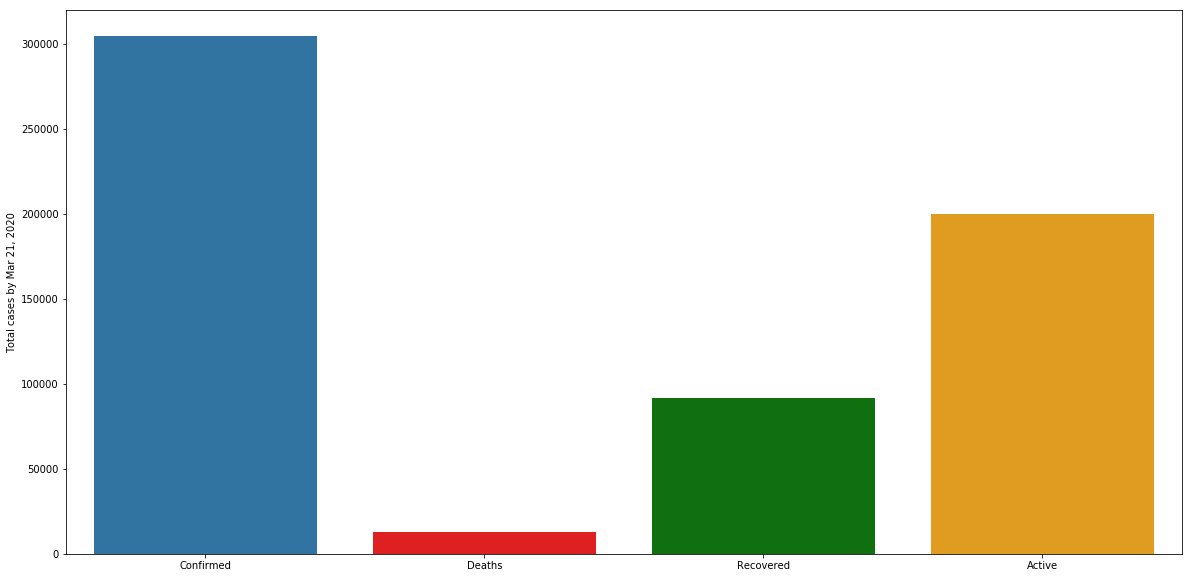

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(total_data.index, total_data[total_column], palette=['#1f77b4', 'red', 'green', 'orange'])

Text(0, 0.5, 'Cases')

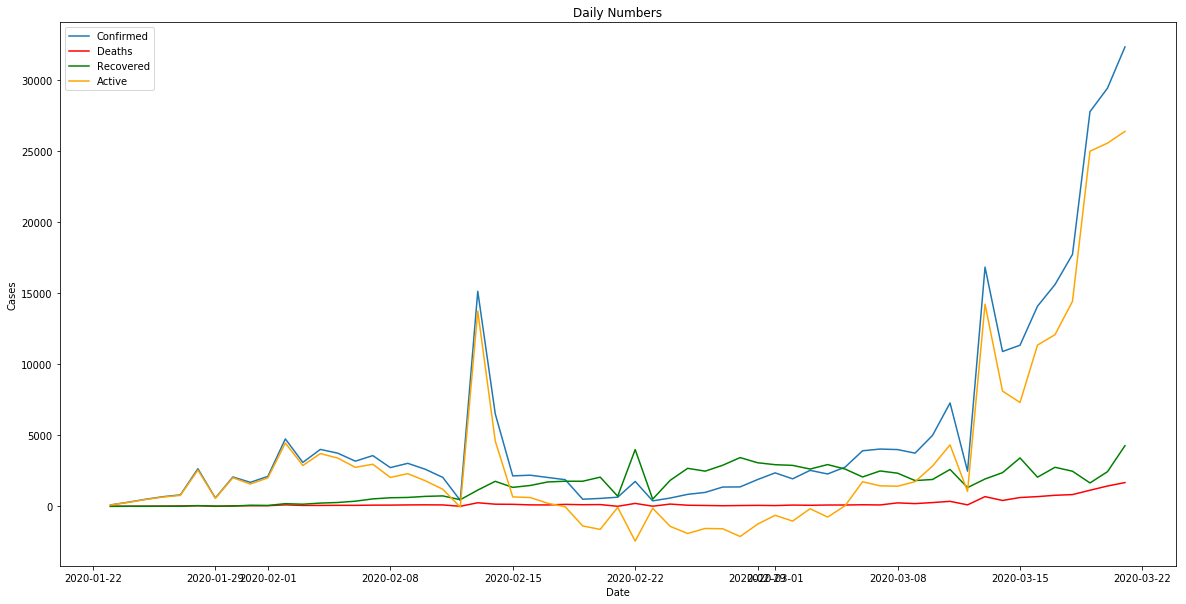

In [24]:
plt.figure(figsize=(20,10))
sns.lineplot(total_cases['Observed'], total_cases['Confirmed'].diff())
sns.lineplot(total_cases['Observed'], total_cases['Deaths'].diff(), color='red')
sns.lineplot(total_cases['Observed'], total_cases['Recovered'].diff(), color='green')
sns.lineplot(total_cases['Observed'], total_cases['Active'].diff(), color='orange')
plt.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])
plt.title('Daily Numbers')
plt.xlabel('Date')
plt.ylabel('Cases')

### Loading some more details

In [111]:
details_in_Hubei = pd.read_csv(f'{path_to_dataset}/COVID19_2020_open_line_list - Hubei.csv')
details_outside_Hubei = pd.read_csv(f'{path_to_dataset}/COVID19_2020_open_line_list - outside_Hubei.csv')

In [124]:
details = pd.concat([details_in_Hubei, details_outside_Hubei], ignore_index=True)

In [127]:
keep_columns = ['ID', 'age', 'sex', 
                'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation', 
                'symptoms']
details = details[keep_columns]

### Listing Symptoms

In [128]:
symptoms = sorted([ item for item in list(set(details['symptoms'])) if type(item) == str])

In [129]:
dfSymptoms = pd.DataFrame.from_dict({'Symptoms': symptoms})

# Aligning to the left
dfSymptoms.style\
    .set_properties(**{'text-align': 'left'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

,Symptoms
0,"37.1 ° C, mild coughing"
1,"Cough, fever (38 ℃)"
2,"Cough, headache, general malaise"
3,"Cough, headache, general malaise, sore throat"
4,"Discharge, cough, sore throat, chest pain"
5,"Fever (37.4 ° C), malaise, sore throa"
6,Fever (38 ° C)
7,"Fever (38.1 ° C), cough, headache."
8,"Fever, cough"
9,"Fever, cough Difficulty breathing"


### Distribution of Ages

In [135]:
def process_age_column(age_range):
    try:
        return np.mean(list(map(lambda age: int(age), age_range.split('-'))))
    except:
        return None

In [136]:
ages = details['age'].apply(process_age_column)

In [137]:
ages = ages[ages.isna() == False]

In [138]:
ages.describe()

count    3177.000000
mean       48.343563
std        17.325500
min         1.000000
25%        36.000000
50%        47.500000
75%        61.000000
max        96.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Distribution of Ages')

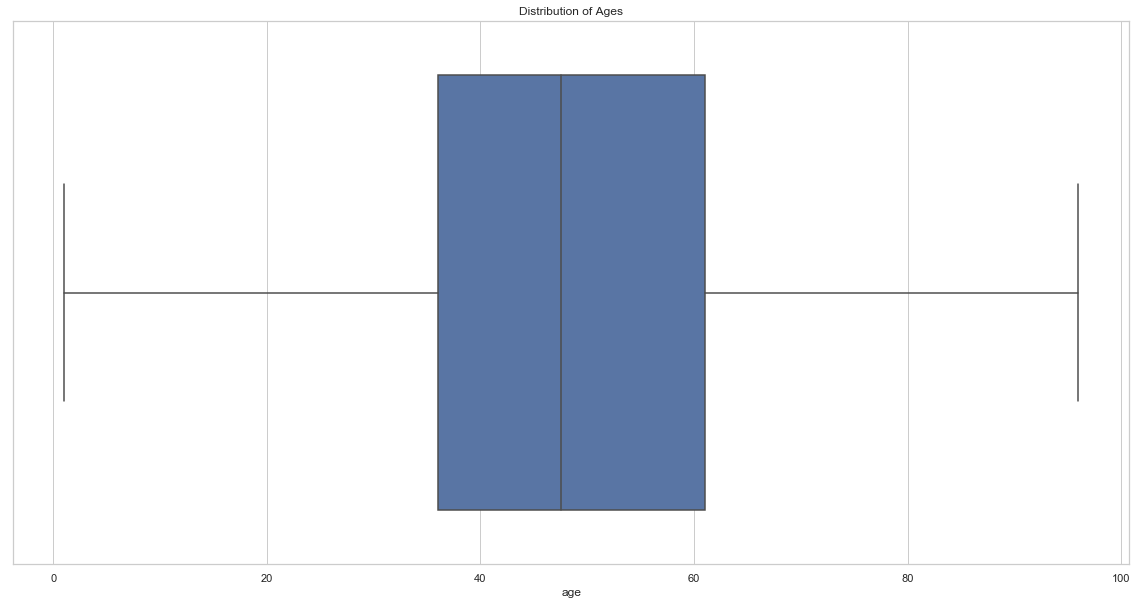

In [144]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.boxplot(ages)
plt.title('Distribution of Ages')

### Sex Distribution

In [146]:
sex = details[details['sex'].isnull() == False]['sex'].apply(lambda sex: sex.lower()).value_counts()

male      1599
female    1341
Name: sex, dtype: int64

Text(0.5, 1.0, 'Sex Distribution')

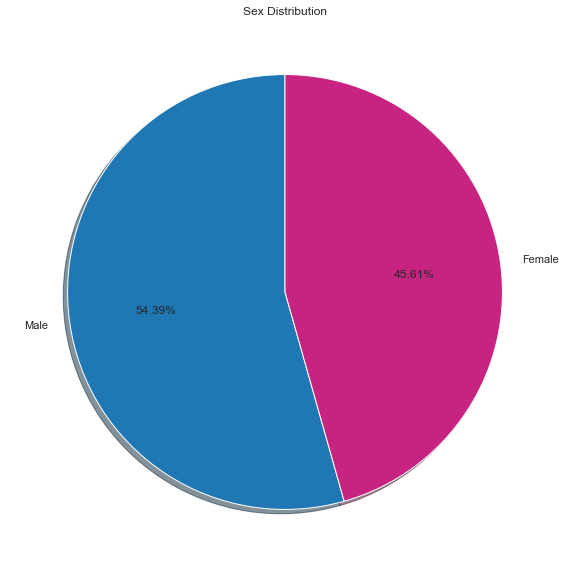

In [153]:
plt.figure(figsize=(10,10))
plt.pie(sex, 
        labels=['Male', 'Female'], 
        colors=['#1f77b4', '#c72481'],
        autopct='%.2f%%', 
        startangle=90, 
        shadow=True)
plt.title('Sex Distribution')